In [17]:
from flask import Flask, render_template, request
from PIL import Image
import torch
import torchvision.transforms as transforms
import torchvision
import lightning as L
import matplotlib.pyplot as plt
import os
import numpy as np
from src.datasets import ShapesDataset, ToTensor
from src.utils import create_square

app = Flask(__name__)

# Load your PyTorch model
# Replace 'YourModelClass' and 'your_model.pth' with your actual model class and path
from src.models import ImageInpainting, UNet

model = ImageInpainting.load_from_checkpoint(checkpoint_path='checkpoints/inference.ckpt', model=UNet(), config=None)

# Define the transformation for input images
transform = transforms.Compose([
    transforms.Resize((256, 256))
])

/home/ignacy/miniconda3/envs/putenv/lib/python3.11/site-packages/pytorch_lightning/utilities/migration/utils.py:55: The loaded checkpoint was produced with Lightning v2.1.3, which is newer than your current Lightning version: v2.1.2
/home/ignacy/miniconda3/envs/putenv/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:198: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


In [18]:
def plot_grid_of_images(images, nrow=5, figsize=(10, 10), save_name='demo'):
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    ax.imshow(torchvision.utils.make_grid(images, nrow=nrow, normalize=True, scale_each=True).permute(1, 2, 0))
    plt.savefig(f'public/{save_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

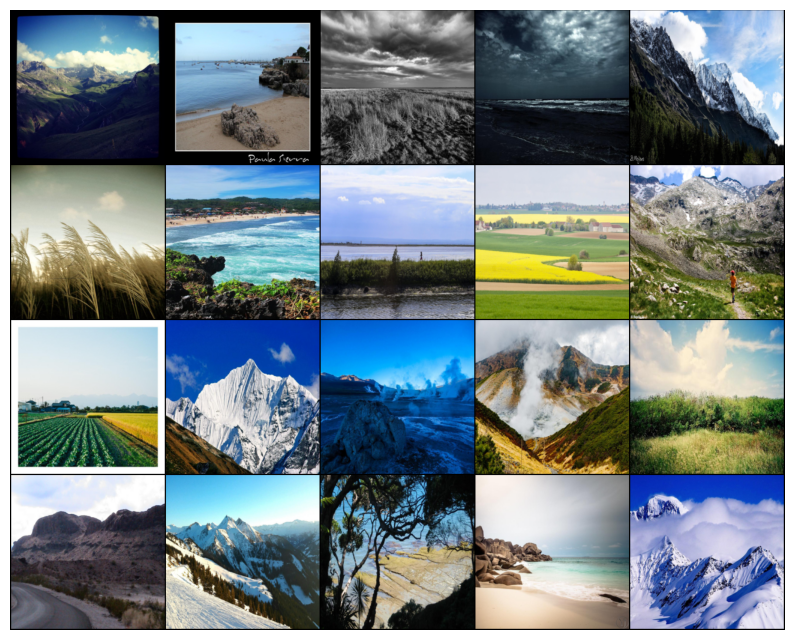

torch.Size([20, 3, 256, 256])

In [24]:
DATA = 'data/raw/landscape' 
files = os.listdir(DATA)
files = [os.path.join(DATA, file) for file in files][:20]
images = [Image.open(file)  for file in files]
images = np.array([transform(image)  for image in images])

masks = np.array([create_square(32) for i in range(20)])

dataset = ShapesDataset(images, transform=ToTensor(), masks=masks, augument=False)
images = [dataset[i]['image'] / 255.0 for i in range(20)]

batch = torch.stack(images)
plot_grid_of_images(batch, save_name='demo_original')
batch.shape

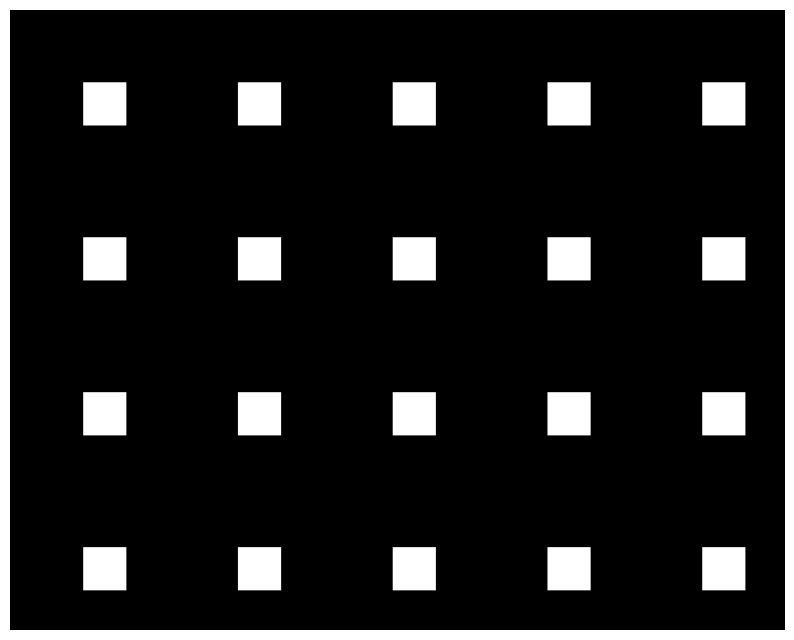

torch.Size([20, 3, 256, 256])

In [20]:
masks = torch.zeros_like(batch)
# mask square in center
masks[:, :, 120:192, 120:192] = 1.0
plot_grid_of_images(masks, save_name='demo_mask')
masks.shape

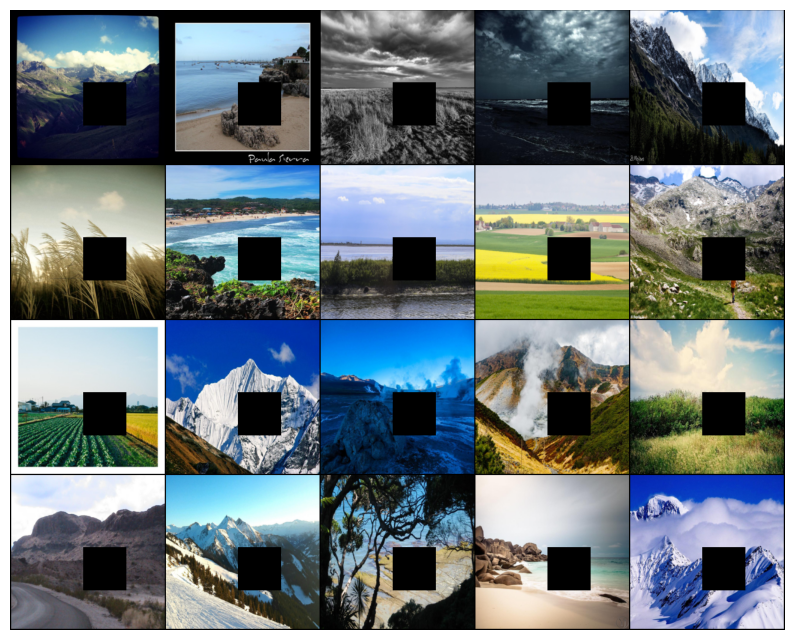

torch.Size([20, 3, 256, 256])

In [21]:
masked_images = batch * (1 - masks)
plot_grid_of_images(masked_images, save_name='demo_masked')
masked_images.shape

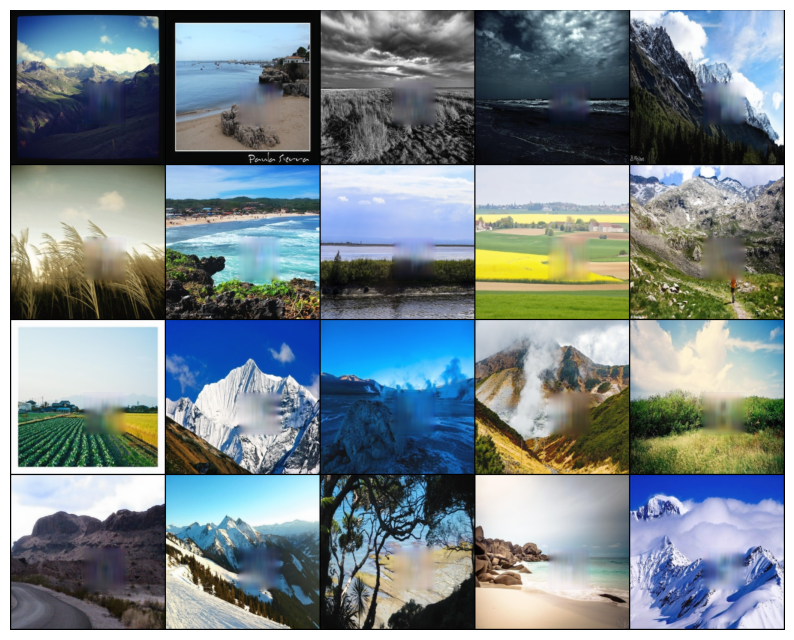

torch.Size([20, 3, 256, 256])

In [22]:
pred_batch = model(masks, masked_images)
plot_grid_of_images(pred_batch, save_name='demo_output')
pred_batch.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


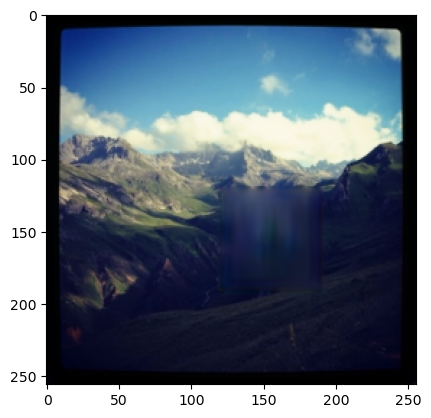

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


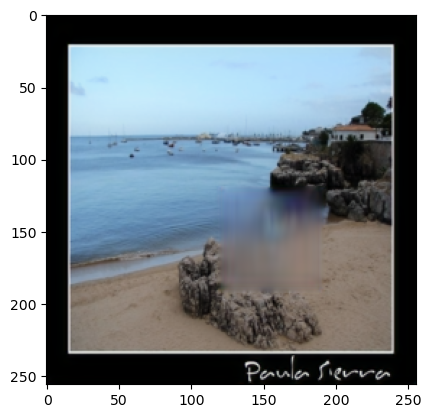

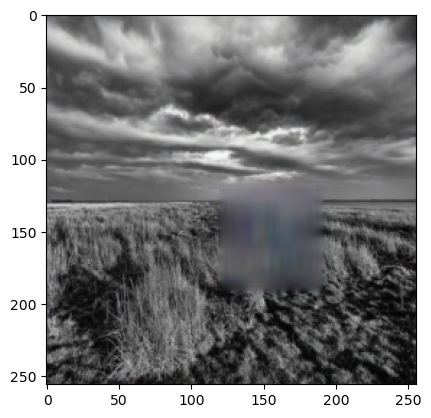

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


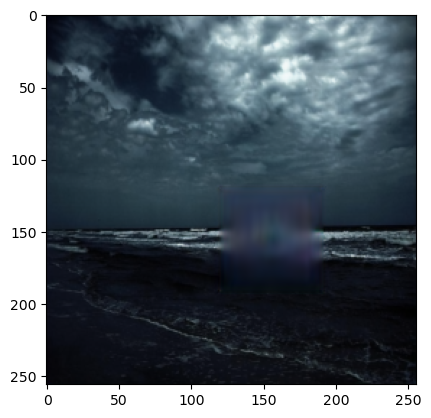

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


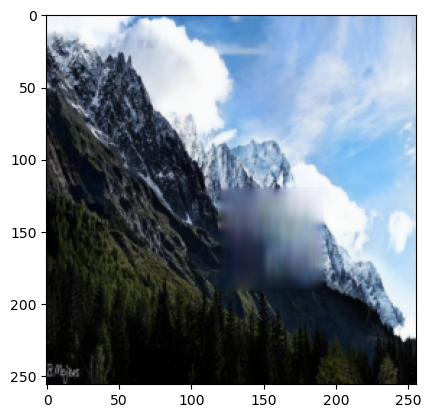

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


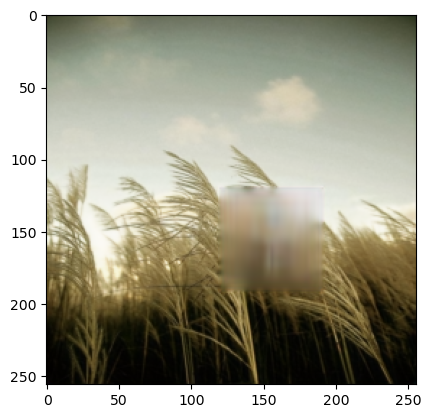

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


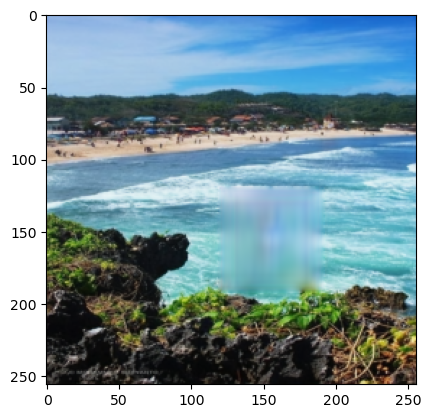

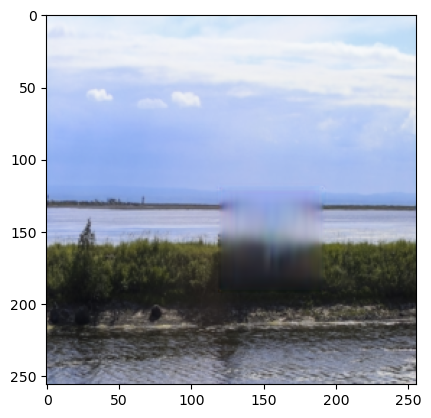

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


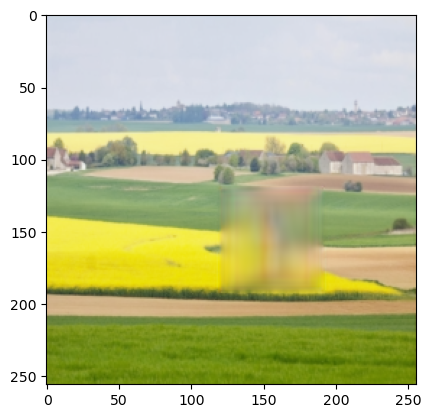

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


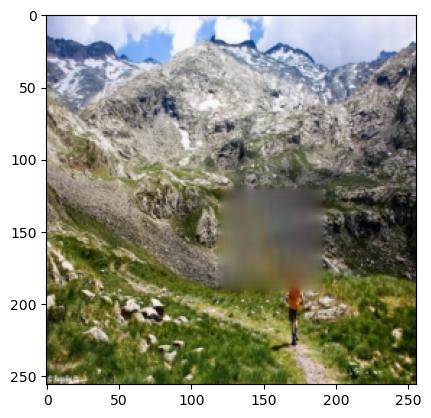

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


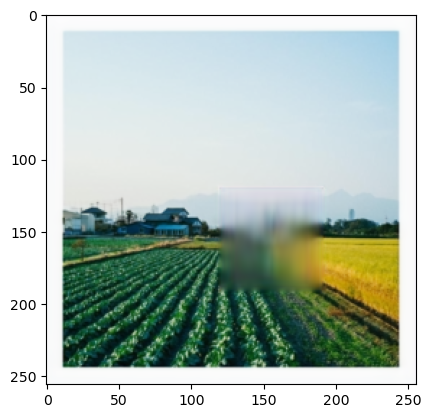

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


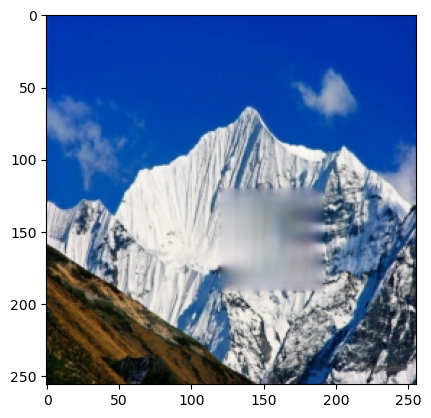

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


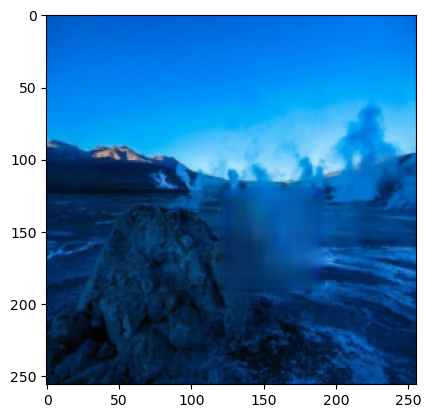

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


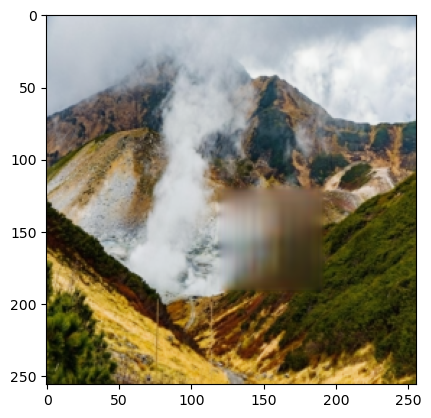

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


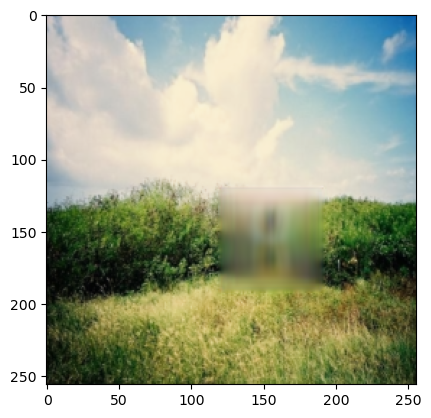

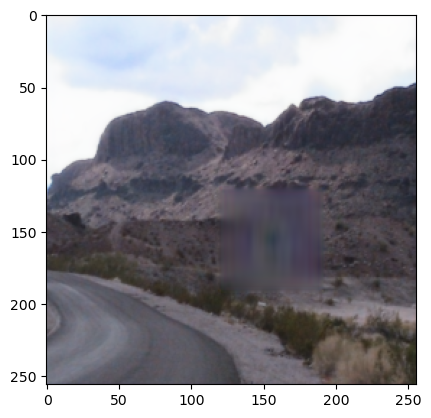

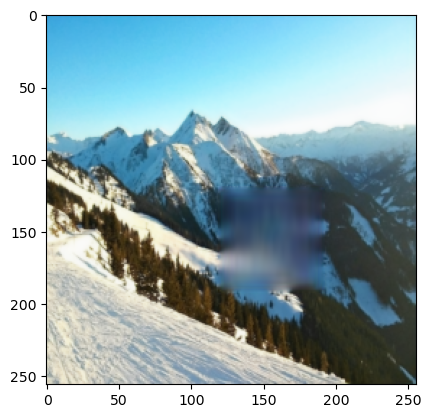

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


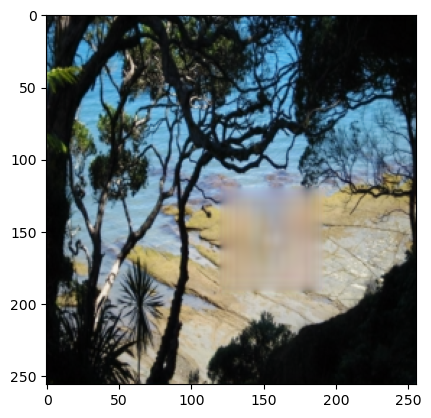

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


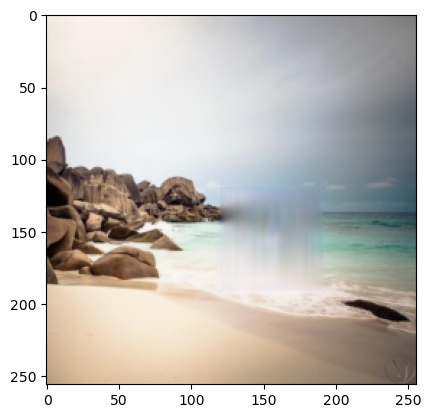

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


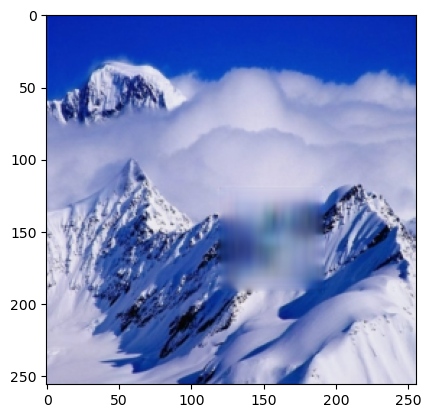

In [23]:
for i in range(20):
    plt.imshow(pred_batch[i].permute(1, 2, 0).detach().numpy())
    plt.show()